# Self-organizing map

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 4 - Self Organizing Maps (SOM)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 4 - Self Organizing Maps (SOM)


## Importar las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom  # alternativa --> pip install minisom
from pylab import bone, pcolor, colorbar, plot, show

## Importar el dataset


In [ ]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Escalado de características

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

## Entrenar el SOM

In [ ]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizar los resultados


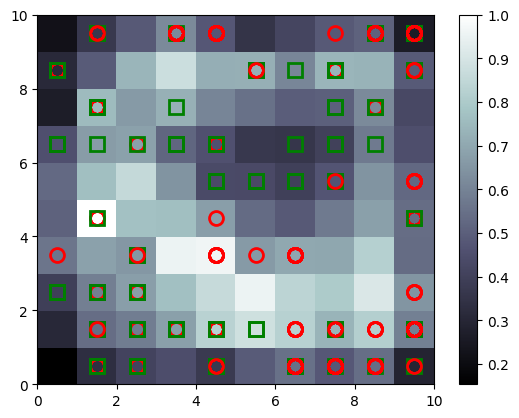

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor="None",
         markersize=10, markeredgewidth=2)
show()

## Encontrar los fraudes

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1, 4)], mappings[(4, 3)]), axis=0)
frauds = scaler.inverse_transform(frauds)